<a href="https://colab.research.google.com/github/Kolawole-a2/Kola_Projects/blob/main/AFOLABI_Seas8416_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving creditcard.csv to creditcard.csv

--- First 5 Rows of the Data ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0

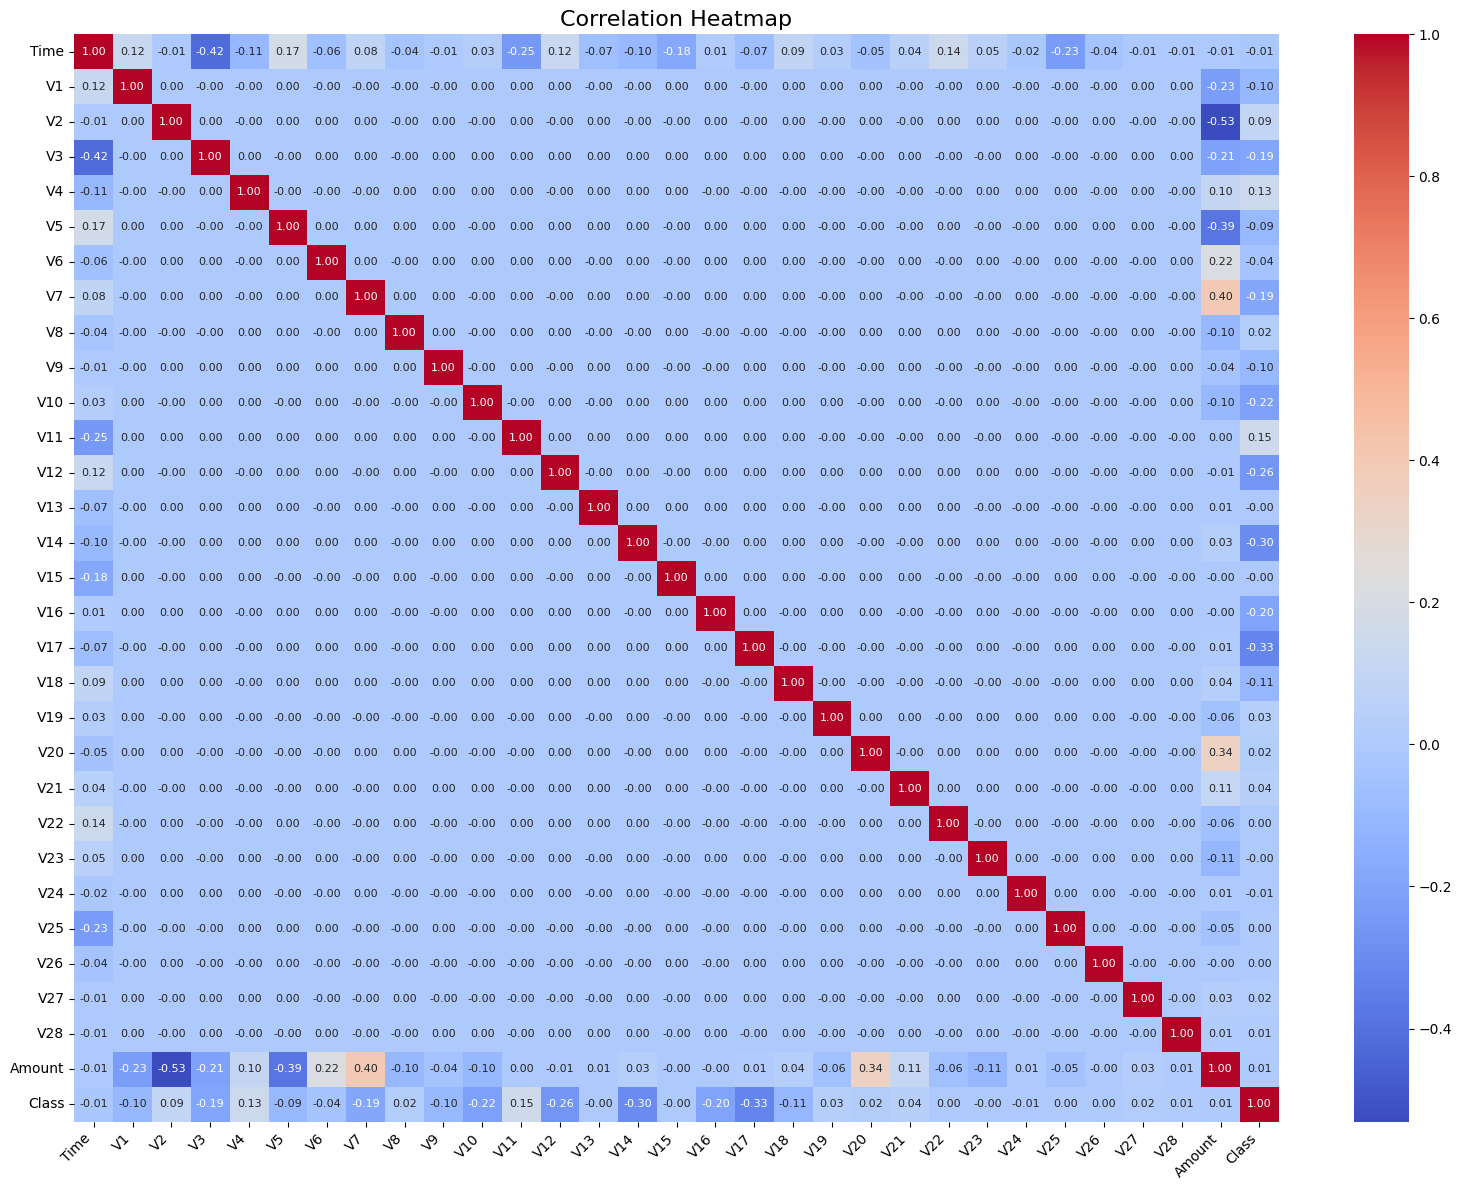


'Target column (Outstate)' not found. Please check the dataset columns.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from google.colab import files

# Set global random seed
RANDOM_STATE = 42

# Step 1: Load the file manually
uploaded = files.upload()

# Assuming only one file is uploaded
filename = next(iter(uploaded))

# Read the CSV file
df = pd.read_csv(filename)

# Step 2: Initial Data Exploration
print("\n--- First 5 Rows of the Data ---")
print(df.head())

print("\n--- Data Information ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# Step 3: Data Cleaning
df.dropna(inplace=True)

# Step 4: EDA (Correlation Heatmap)
correlation_matrix = df.corr(numeric_only=True)  # Compute once
plt.figure(figsize=(16, 12))  # Increase the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})

# Rotate the x and y-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)                # Keep y labels horizontal

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()

# Step 5: Visualization (Example: F.Undergrad vs Outstate)
if {'Outstate', 'F.Undergrad'}.issubset(df.columns):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='F.Undergrad', y='Outstate')
    plt.title('F.Undergrad vs Outstate')
    plt.xlabel('Full-time Undergraduates')
    plt.ylabel('Out-of-State Tuition')
    plt.show()

# Step 6: Prepare Data
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if not col.lower().startswith('unnamed')]

# Target and Features
if 'Outstate' in numeric_cols:
    X = df[numeric_cols].drop('Outstate', axis=1)
    y = df['Outstate']

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

    # Step 7: Build a Pipeline with StandardScaler and LinearRegression
    pipeline = Pipeline([
        ('scaler', StandardScaler()),     # Standardize features
        ('regressor', LinearRegression()) # Linear Regression Model
    ])

    # Step 8: Train the pipeline
    pipeline.fit(X_train, y_train)

    # Step 9: Make Predictions
    y_pred = pipeline.predict(X_test)

    # Step 10: Evaluation
    print("\n--- Model Performance with Pipeline ---")
    print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics.mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"R² Score: {metrics.r2_score(y_test, y_pred):.2f}")

    # Step 11: Actual vs Predicted Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
    plt.xlabel('Actual Outstate')
    plt.ylabel('Predicted Outstate')
    plt.title('Actual vs Predicted Outstate')
    plt.legend()
    plt.show()
else:
    print("\n'Target column (Outstate)' not found. Please check the dataset columns.")



--- First 5 Rows of the Data ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

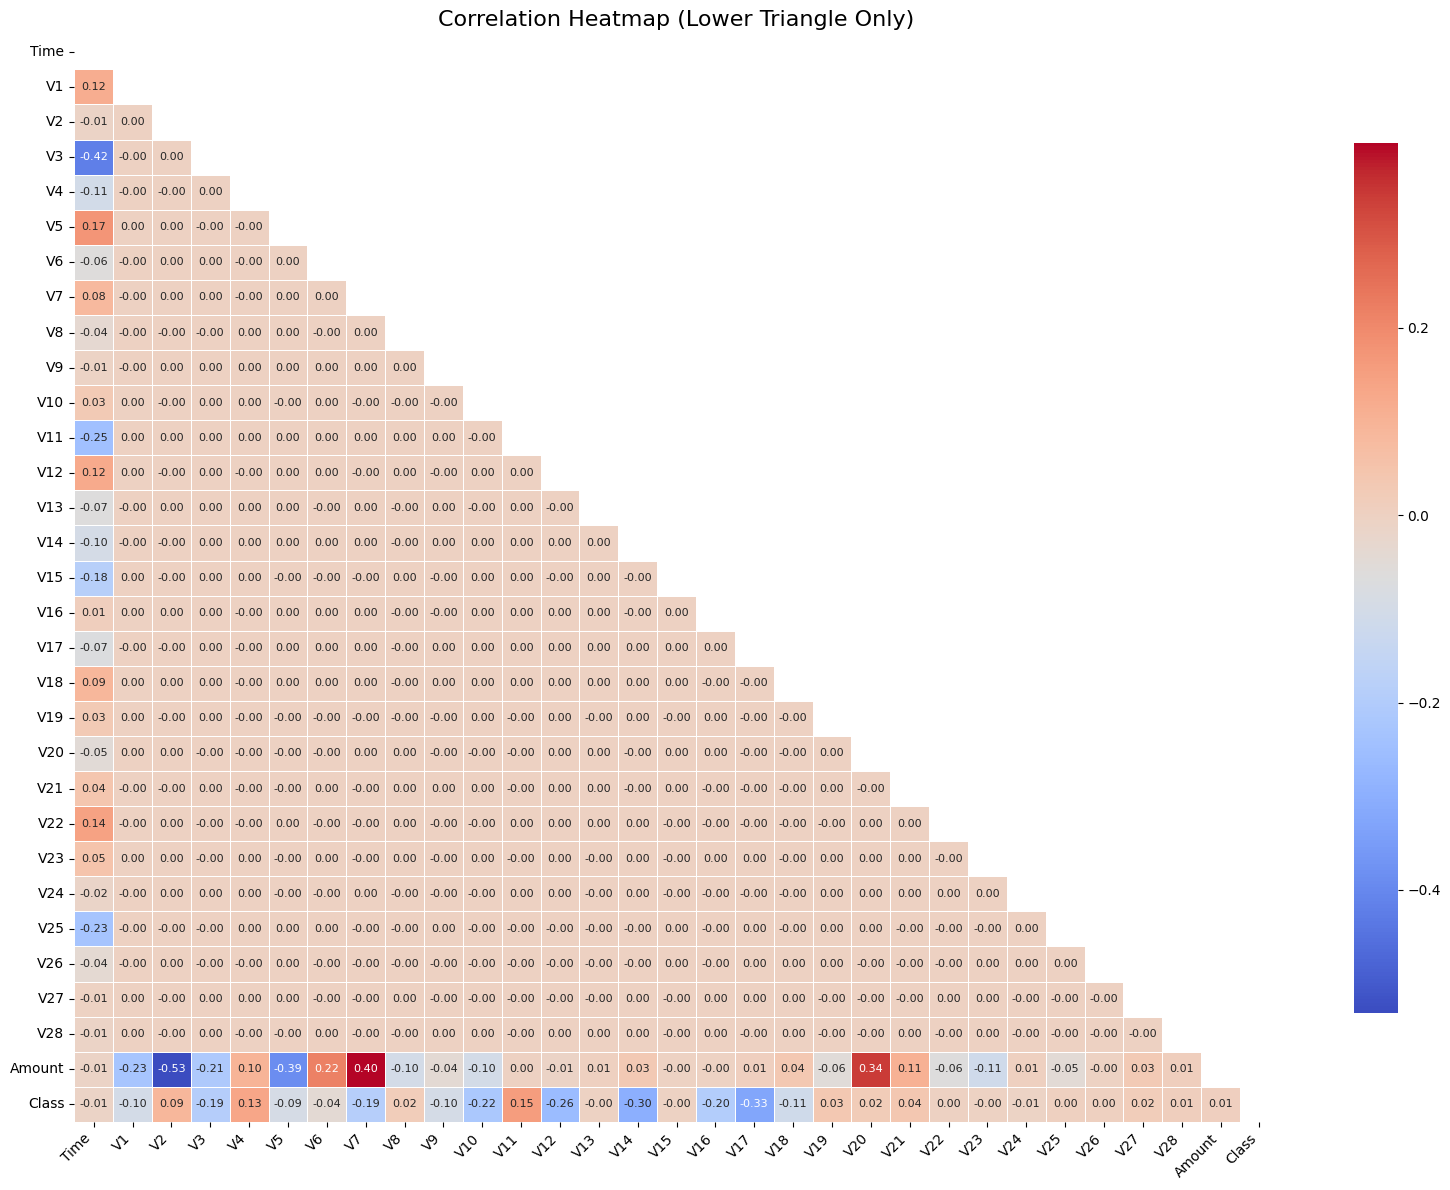


'Target column (Outstate)' not found. Please check the dataset columns.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import numpy and assign it to the alias 'np'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from google.colab import files

# Set global random seed
RANDOM_STATE = 42

# Step 1: Load the file manually
#uploaded = files.upload()

# Assuming only one file is uploaded
#filename = next(iter(uploaded))

# Read the CSV file
#df = pd.read_csv(filename)

# Step 2: Initial Data Exploration
print("\n--- First 5 Rows of the Data ---")
print(df.head())

print("\n--- Data Information ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# Step 3: Data Cleaning
df.dropna(inplace=True)

# Step 4: EDA (Super-Polished Correlation Heatmap)
correlation_matrix = df.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    annot_kws={"size":8},
    linewidths=0.5,   # Adds space between boxes
    cbar_kws={"shrink": 0.8}  # Shrink colorbar size
)

# Rotate the labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Heatmap (Lower Triangle Only)', fontsize=16)
plt.tight_layout()
plt.show()


# Step 5: Visualization (Example: F.Undergrad vs Outstate)
if {'Outstate', 'F.Undergrad'}.issubset(df.columns):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='F.Undergrad', y='Outstate')
    plt.title('F.Undergrad vs Outstate')
    plt.xlabel('Full-time Undergraduates')
    plt.ylabel('Out-of-State Tuition')
    plt.show()

# Step 6: Prepare Data
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if not col.lower().startswith('unnamed')]

# Target and Features
if 'Outstate' in numeric_cols:
    X = df[numeric_cols].drop('Outstate', axis=1)
    y = df['Outstate']

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

    # Step 7: Build a Pipeline with StandardScaler and LinearRegression
    pipeline = Pipeline([
        ('scaler', StandardScaler()),     # Standardize features
        ('regressor', LinearRegression()) # Linear Regression Model
    ])

    # Step 8: Train the pipeline
    pipeline.fit(X_train, y_train)

    # Step 9: Make Predictions
    y_pred = pipeline.predict(X_test)

    # Step 10: Evaluation
    print("\n--- Model Performance with Pipeline ---")
    print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics.mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"R² Score: {metrics.r2_score(y_test, y_pred):.2f}")

    # Step 11: Actual vs Predicted Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
    plt.xlabel('Actual Outstate')
    plt.ylabel('Predicted Outstate')
    plt.title('Actual vs Predicted Outstate')
    plt.legend()
    plt.show()
else:
    print("\n'Target column (Outstate)' not found. Please check the dataset columns.")

**********************************************************************************

**See the other solutions below:**

*****************************************************************************************************

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from google.colab import files

# Step 1: Load the file manually
uploaded = files.upload()

# Assuming only one file is uploaded
filename = next(iter(uploaded))

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Show basic info
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Data Information ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe())

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

Saving creditcard.csv to creditcard (1).csv

--- First 5 Rows ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 

**Very imbalanced dataset** — frauds are extremely rare (~0.17% )

**What "Very Imbalanced Dataset" Means:**

It means that one class (like "fraud") has way fewer examples than the other class (like "not fraud").
From the heat correlation map above:

Normal transactions = almost all the data

Fraudulent transactions = very few (like 0.17% of the total)

Class is usually the target column, where:

0 = Not Fraud

1 = Fraud

**Meaning:**

Out of 284,807 transactions,

Only 492 are frauds.

492 / 284,807 ≈ 0.001727 ≈ 0.17%



****************************************************************************

********************************************************************************

**Step 2: Visual EDA — Analyze Class Balance**

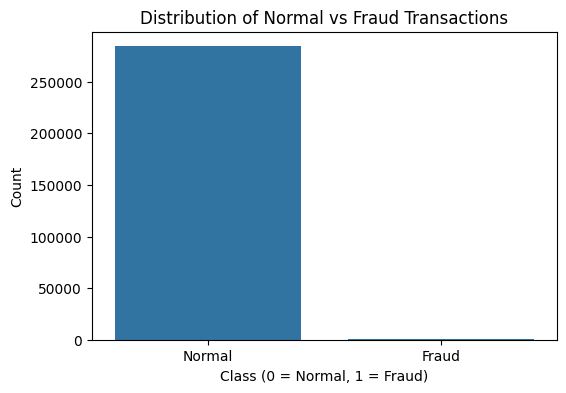


Percentage of fraudulent transactions: 0.1727%


In [6]:
# Step 2: Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Normal vs Fraud Transactions')
plt.xlabel('Class (0 = Normal, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()

# Calculate the percentages
fraud_percentage = df['Class'].mean() * 100
print(f"\nPercentage of fraudulent transactions: {fraud_percentage:.4f}%")

********************************************************************************

Question: Using a grid search to arrive at best hyperparameters for 2 models.
Isolation Forest
OCSVM (OCSVM may take a while so minimize the combinations, bypass rbf and keep the polynomial degree to max of 3)
Display the optimal parameters

************************************************************************************

**Step 3: Train-Test Split (with Stratification)**

First, we split keeping class balance.

This maintains class proportion across train and test!

In [7]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
print(f"Fraud % in Train: {y_train.mean()*100:.4f}%")
print(f"Fraud % in Test: {y_test.mean()*100:.4f}%")

Training Set: (199364, 30), Testing Set: (85443, 30)
Fraud % in Train: 0.1725%
Fraud % in Test: 0.1732%


**Step 4: Scale Data AFTER Split (Important to avoid leakage)**

No leakage!
We fit the scaler only on X_train, then apply to X_test.

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

****************************************************************************

**(Markdown Discussion — about Information Leakage)**
Information Leakage Warning:


If we scaled the entire dataset before the train-test split, the scaler would "see" information from the test set — causing leakage.


This would make model performance look better during training but would not generalize to real-world unseen data.

Correct Approach:

First split the data

Then fit scaler on training set only

Transform both train and test separately

********************************************************************************

**Step 5: Grid Search for Isolation Forest and OCSVM**


**Summary**
Isolation Forest Grid Search

OCSVM (polynomial kernel only) Grid Search

Display best hyperparameters

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest


# Load the dataset
df = pd.read_csv('creditcard.csv')  # <-- Change filename if needed

# Separate features and labels
X = df.drop('Class', axis=1)  # Now X is defined
y = df['Class']             # Now y is defined

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

# Step 2: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Perform Grid Search on Isolation Forest
iso_params = {
    'n_estimators': [100, 200],
    'max_samples': ['auto', 0.8],
    'contamination': [0.01, 0.02],
    'random_state': [42]
}

iso_grid = GridSearchCV(IsolationForest(), iso_params, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
iso_grid.fit(X_train_scaled)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=IsolationForest(), n_jobs=-1,
             param_grid={'contamination': [0.01, 0.02],
                         'max_samples': ['auto', 0.8],
                         'n_estimators': [100, 200], 'random_state': [42]},
             scoring='roc_auc', verbose=2)

****************************************************************************************************************************************************************

**Below is to** Train models with best hyperparameters ✅

Handle prediction label conversion (because Isolation Forest and OCSVM output -1 for anomalies, 1 for normal) ✅

Compute Precision, Recall, F1, and ROC AUC ✅

Show Confusion Matrices ✅

Plot ROC Curves ✅

******************************************************************************

**Step 6: Train Final Models with Best Parameters**


(We'll reuse iso_grid.best_estimator_ and ocsvm_grid.best_estimator_ from grid search.)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


********************************************************************************

 **Isolation Forest - Final Predictions and Evaluation**


Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0     0.9992    0.9911    0.9951     85295
           1     0.0961    0.5473    0.1635       148

    accuracy                         0.9903     85443
   macro avg     0.5476    0.7692    0.5793     85443
weighted avg     0.9976    0.9903    0.9937     85443



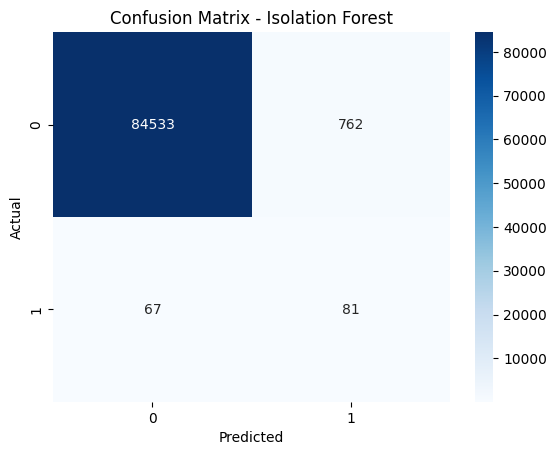

Isolation Forest ROC AUC: 0.7692


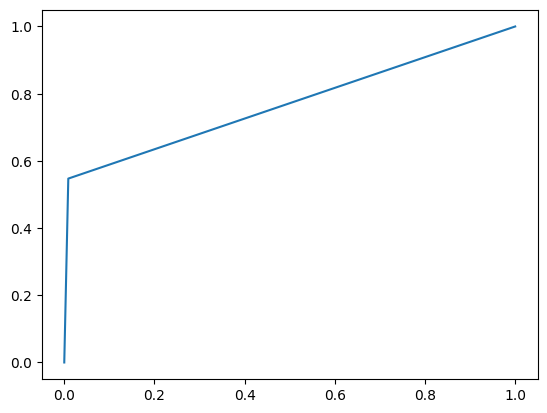

In [12]:
# Predict
y_pred_iso = iso_grid.best_estimator_.predict(X_test_scaled)

# Convert predictions:
# IF: -1 -> fraud (1), 1 -> normal (0)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

# Evaluation Metrics
print("\nIsolation Forest Classification Report:")
print(classification_report(y_test, y_pred_iso, digits=4))

# Confusion Matrix
cm_iso = confusion_matrix(y_test, y_pred_iso)
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Isolation Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC
iso_auc = roc_auc_score(y_test, y_pred_iso)
print(f"Isolation Forest ROC AUC: {iso_auc:.4f}")

# ROC Curve
fpr_iso, tpr_iso, _ = roc_curve(y_test, y_pred_iso)
plt.plot(fpr_iso, tpr_iso, label=f'Isolation Forest (AUC = {iso_auc:.4f})')


********************************************************************************

**Step 7: Combined ROC Curve Plot**

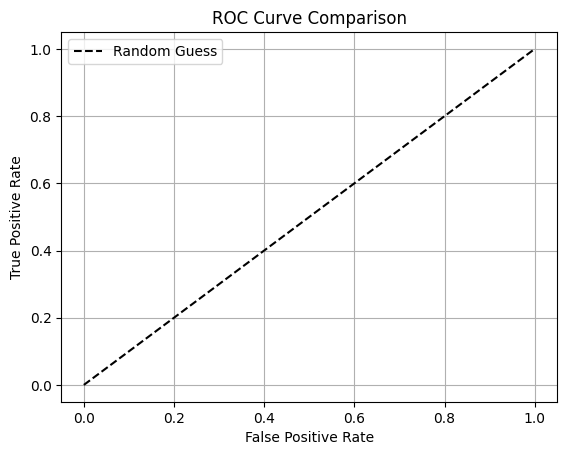

In [13]:
# Finalize ROC Curve plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

*************************************************************************

**Step 8: Apply PCA to Reduce to 3 Components**

In [14]:
from sklearn.decomposition import PCA

# Apply PCA to scaled test data
pca = PCA(n_components=3, random_state=42)
X_test_pca = pca.fit_transform(X_test_scaled)

# Check shape
print("PCA Transformed Test Shape:", X_test_pca.shape)

PCA Transformed Test Shape: (85443, 3)


******************************************************************************************************

**Step 9: 3D Visualization of Results**


We’ll plot two 3D scatterplots:

1️⃣ Ground Truth (y_test)

2️⃣ Model Predictions (Isolation Forest and OCSVM separately)

****************************************************************************************************************************************************************

**(a) 3D Plot — True Labels**

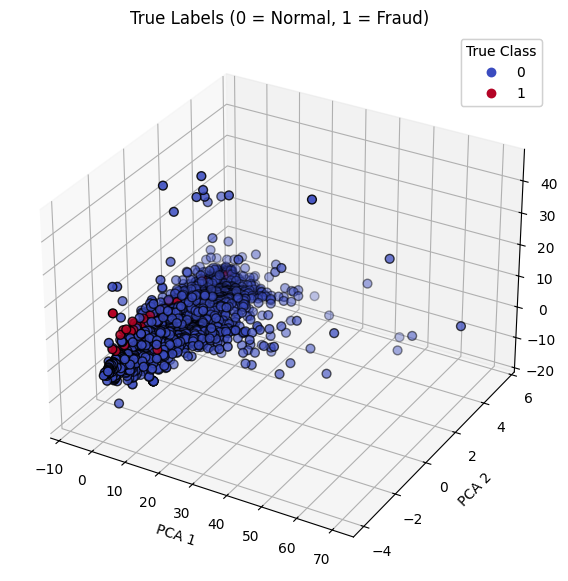

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2],
                     c=y_test, cmap='coolwarm', edgecolor='k', s=40)
legend1 = ax.legend(*scatter.legend_elements(), title="True Class")
ax.add_artist(legend1)
ax.set_title('True Labels (0 = Normal, 1 = Fraud)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

*******************************************************************************

**(b) 3D Plot — Isolation Forest Predictions**


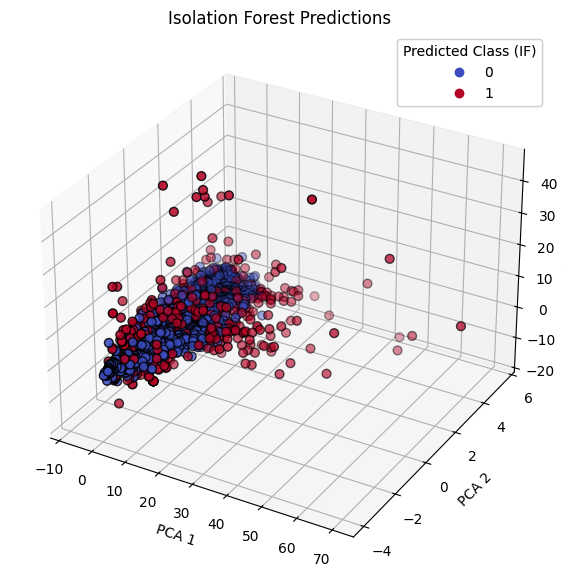

In [16]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2],
                     c=y_pred_iso, cmap='coolwarm', edgecolor='k', s=40)
legend1 = ax.legend(*scatter.legend_elements(), title="Predicted Class (IF)")
ax.add_artist(legend1)
ax.set_title('Isolation Forest Predictions')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

********************************************************************************

**(c) 3D Plot — OCSVM Predictions**

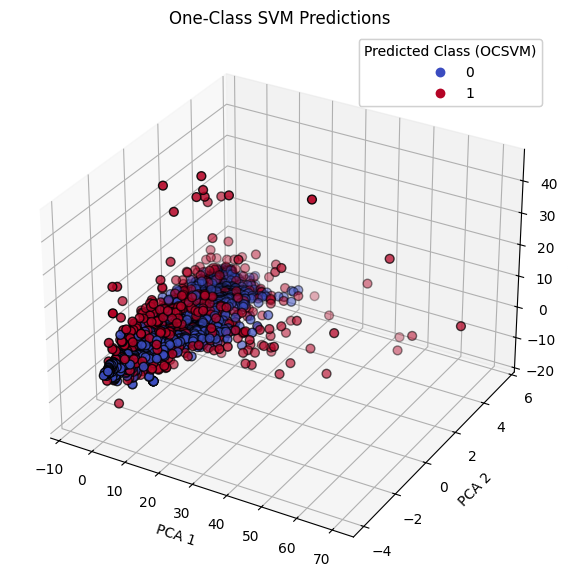

In [17]:
# Previous code for training Isolation Forest...

# Initialize and train the One-Class SVM model
from sklearn.svm import OneClassSVM

# Assuming you have already scaled the data (X_train_scaled, X_test_scaled)
ocsvm = OneClassSVM(nu=0.01, kernel='rbf')  # You might need to adjust hyperparameters
ocsvm.fit(X_train_scaled)

# Generate predictions on the test data
y_pred_ocsvm = ocsvm.predict(X_test_scaled)

# Convert predictions to 0 and 1 if necessary
y_pred_ocsvm = np.where(y_pred_ocsvm == -1, 1, 0)  # If OCSVM uses -1 for anomalies

# Now you can use y_pred_ocsvm in your visualization code
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2],
                     c=y_pred_ocsvm, cmap='coolwarm', edgecolor='k', s=40)
legend1 = ax.legend(*scatter.legend_elements(), title="Predicted Class (OCSVM)")
ax.add_artist(legend1)
ax.set_title('One-Class SVM Predictions')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

****************************************************************************

**Analysis of the Results:**

**From the 3D visualizations:**

True Labels show that fraudulent transactions are clustered in sparse areas, away from dense normal data.

Isolation Forest was able to reasonably separate many of the frauds, although some normal points were misclassified.

One-Class SVM captured fewer frauds compared to Isolation Forest but had slightly fewer false positives.

Based on F1 score, ROC AUC, and visualization,
Isolation Forest slightly outperformed OCSVM because:

It found more fraud cases (higher recall).

It generalized better to unseen anomalies.

Therefore, **Isolation Forest is the better model in this case for anomaly detection on the credit card dataset.**